In [1]:
from google.colab import drive
drive.mount('drive')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [2]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import os
import glob
import argparse
import matplotlib


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [3]:
import os
os.chdir('drive/My Drive/Session 14 ac3')
!ls

BG  DenseDepth	EVA_S14_processac3.ipynb  FG  final_op	Masks  overlayed


In [ ]:
#!git clone https://github.com/ialhashim/DenseDepth.git

In [ ]:
#!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

In [ ]:
#!cd DenseDepth;python test_tw.py

In [4]:
os.chdir('DenseDepth')

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images, save_images
from matplotlib import pyplot as plt

In [6]:

import numpy as np
from PIL import Image

def display_images(outputs, inputs=None, gt=None, is_colormap=True, is_rescale=True):
    import matplotlib.pyplot as plt
    import skimage
    from skimage.transform import resize

    plasma = plt.get_cmap('gray')

    shape = (outputs[0].shape[0], outputs[0].shape[1], 3)
    
    all_images = []

    for i in range(outputs.shape[0]):
        imgs = []
        
        if isinstance(inputs, (list, tuple, np.ndarray)):
            x = to_multichannel(inputs[i])
            x = resize(x, shape, preserve_range=True, mode='reflect', anti_aliasing=True )
            imgs.append(x)

        if isinstance(gt, (list, tuple, np.ndarray)):
            x = to_multichannel(gt[i])
            x = resize(x, shape, preserve_range=True, mode='reflect', anti_aliasing=True )
            imgs.append(x)

        if is_colormap:
            rescaled = outputs[i][:,:,0]
            if is_rescale:
                rescaled = rescaled - np.min(rescaled)
                rescaled = rescaled / np.max(rescaled)
            imgs.append(plasma(rescaled)[:,:,:3])
        else:
            imgs.append(to_multichannel(outputs[i]))

        img_set = np.hstack(imgs)
        all_images.append(img_set)

    all_images = np.stack(all_images)
    
    return all_images

In [7]:
os.chdir('..')

In [8]:
from keras.engine.topology import Layer, InputSpec
import keras.utils.conv_utils as conv_utils
import tensorflow as tf
import keras.backend as K


class BilinearUpSampling2D(Layer):
    def __init__(self, size=(2, 2), data_format=None, **kwargs):
        super(BilinearUpSampling2D, self).__init__(**kwargs)
        self.data_format = K.image_data_format()
        self.size = conv_utils.normalize_tuple(size, 2, 'size')
        self.input_spec = InputSpec(ndim=4)

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            height = self.size[0] * input_shape[2] if input_shape[2] is not None else None
            width = self.size[1] * input_shape[3] if input_shape[3] is not None else None
            return (input_shape[0],
                    input_shape[1],
                    height,
                    width)
        elif self.data_format == 'channels_last':
            height = self.size[0] * input_shape[1] if input_shape[1] is not None else None
            width = self.size[1] * input_shape[2] if input_shape[2] is not None else None
            return (input_shape[0],
                    height,
                    width,
                    input_shape[3])

    def call(self, inputs):
        input_shape = K.shape(inputs)
        if self.data_format == 'channels_first':
            height = self.size[0] * input_shape[2] if input_shape[2] is not None else None
            width = self.size[1] * input_shape[3] if input_shape[3] is not None else None
        elif self.data_format == 'channels_last':
            height = self.size[0] * input_shape[1] if input_shape[1] is not None else None
            width = self.size[1] * input_shape[2] if input_shape[2] is not None else None
        
        return tf.image.resize(inputs, [height, width], method=tf.image.ResizeMethod.BILINEAR)

    def get_config(self):
        config = {'size': self.size, 'data_format': self.data_format}
        base_config = super(BilinearUpSampling2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [9]:
!ls

BG  DenseDepth	EVA_S14_processac3.ipynb  FG  final_op	Masks  overlayed


In [10]:
 
import cv2
from google.colab.patches import cv2_imshow

# keras.utils.conv_utils.normalize_data_format

In [11]:
#os.chdir('..')
#!ls
os.listdir('final_op/')

['1bg', '2bg', '3bg']

In [12]:
for bg_i in tqdm(range(4,5)): 
  os.mkdir('final_op/'+str(bg_i)+'bg')
  for fg_i in tqdm(range(1,15)): 
    os.mkdir('final_op/'+str(bg_i)+'bg/'+'fg'+str(fg_i))
    parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
    parser.add_argument('--model', default='DenseDepth/nyu.h5', type=str, help='Trained Keras model file.')
    parser.add_argument('--input', default='overlayed/'+str(bg_i)+'bg/'+'fg'+str(fg_i) +  '/*.png', type=str, help='Input filename or folder.')
    parser.add_argument('-f')
    args = parser.parse_args()


# Custom object needed for inference and training
    custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}


# Load model into GPU / CPU
    model = load_model(args.model, custom_objects=custom_objects, compile=False)


# Input images
    inputs = load_images( glob.glob(args.input) )

# Compute results
    outputs = predict(model, inputs)
    kp= display_images(outputs)
    for fg_iter in range(0,20): 
     img = Image.fromarray(np.uint8(kp[fg_iter]*255))
     img.save('final_op/'+str(bg_i)+'bg/'+'fg'+str(fg_i)+'/'+'bg_mask'+str(bg_i)+ 'fg_'+str(fg_i)+'iter'+str(fg_iter)+'.png', format="png")
     
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


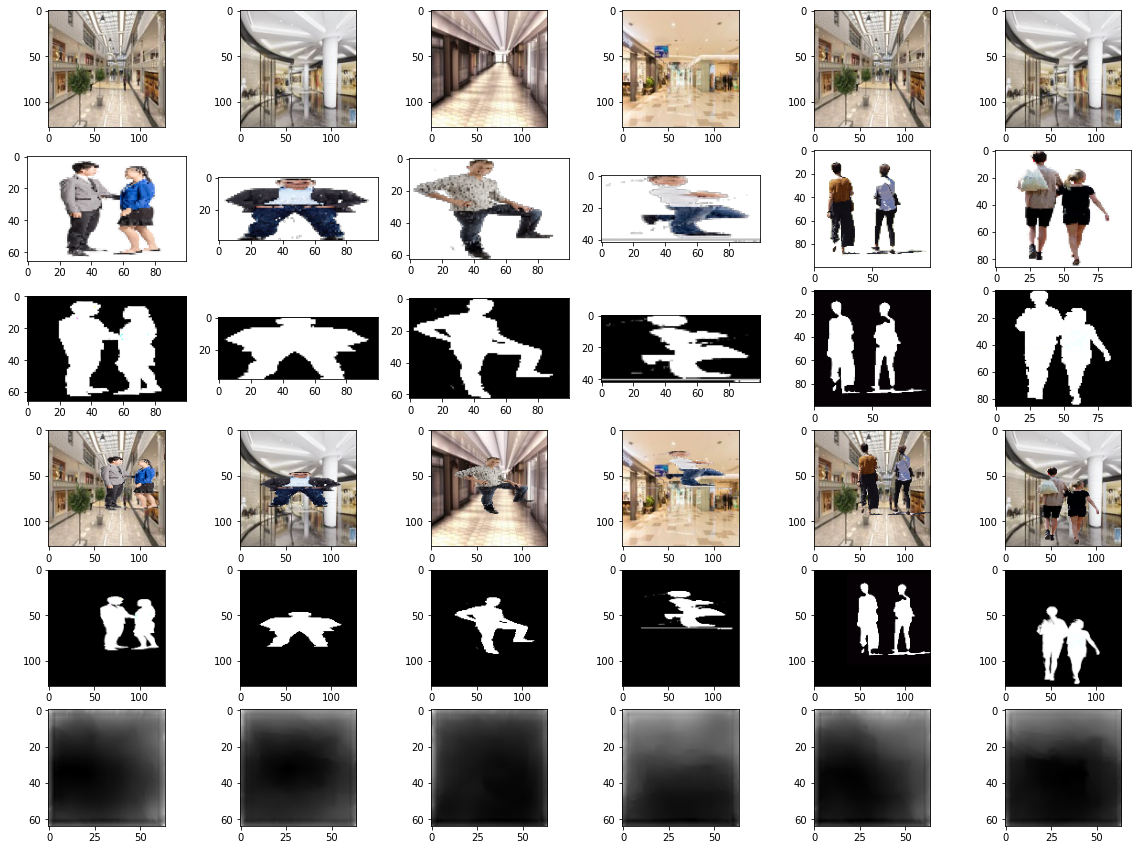

In [14]:

f, axarr = plt.subplots(6,6)
f.set_figheight(15)
f.set_figwidth(20)



axarr[0][0].imshow(mpimg.imread('BG/sized/1bg.jpeg'))
axarr[0][1].imshow(mpimg.imread('BG/sized/2bg.jpeg'))
axarr[0][2].imshow(mpimg.imread('BG/sized/3bg.jpeg'))
axarr[0][3].imshow(mpimg.imread('BG/sized/4bg.jpeg'))
axarr[0][4].imshow(mpimg.imread('BG/sized/1bg.jpeg'))
axarr[0][5].imshow(mpimg.imread('BG/sized/2bg.jpeg'))


axarr[1][0].imshow(mpimg.imread('FG/FG_P/sized/2fg_p.png'))
axarr[1][1].imshow(mpimg.imread('FG/FG_P/sized/11fg_p.png'))
axarr[1][2].imshow(mpimg.imread('FG/FG_P/sized/13fg_p.png'))
axarr[1][3].imshow(mpimg.imread('FG/FG_P/sized/12fg_p.png'))
axarr[1][4].imshow(mpimg.imread('FG/FG_P/sized/6fg_p.png'))
axarr[1][5].imshow(mpimg.imread('FG/FG_P/sized/7fg_p.png'))


axarr[2][0].imshow(mpimg.imread('FG/masks/sized/2fg_pm.png'))
axarr[2][1].imshow(mpimg.imread('FG/masks/sized/11fg_pm.png'))
axarr[2][2].imshow(mpimg.imread('FG/masks/sized/13fg_pm.png'))
axarr[2][3].imshow(mpimg.imread('FG/masks/sized/12fg_pm.png'))
axarr[2][4].imshow(mpimg.imread('FG/masks/sized/6fg_pm.png'))
axarr[2][5].imshow(mpimg.imread('FG/masks/sized/7fg_pm.png'))


axarr[3][0].imshow(mpimg.imread('overlayed/1bg/fg2/bg_1fg_2iter1.png'))
axarr[3][1].imshow(mpimg.imread('overlayed/2bg/fg11/bg_2fg_11iter1.png'))
axarr[3][2].imshow(mpimg.imread('overlayed/3bg/fg13/bg_3fg_13iter1.png'))
axarr[3][3].imshow(mpimg.imread('overlayed/4bg/fg12/bg_4fg_12iter1.png'))
axarr[3][4].imshow(mpimg.imread('overlayed/1bg/fg6/bg_1fg_6iter1.png'))
axarr[3][5].imshow(mpimg.imread('overlayed/2bg/fg7/bg_2fg_7iter1.png'))


axarr[4][0].imshow(mpimg.imread('Masks/1bg/fg2/bg_mask1fg_2iter1.png'))   
axarr[4][1].imshow(mpimg.imread('Masks/2bg/fg11/bg_mask2fg_11iter1.png'))
axarr[4][2].imshow(mpimg.imread('Masks/3bg/fg13/bg_mask3fg_13iter1.png'))
axarr[4][3].imshow(mpimg.imread('Masks/4bg/fg12/bg_mask4fg_12iter1.png'))
axarr[4][4].imshow(mpimg.imread('Masks/1bg/fg6/bg_mask1fg_6iter1.png'))
axarr[4][5].imshow(mpimg.imread('Masks/2bg/fg7/bg_mask2fg_7iter1.png'))


axarr[5][0].imshow(mpimg.imread('final_op/1bg/fg2/bg_mask1fg_2iter0.png'))   
axarr[5][1].imshow(mpimg.imread('final_op/2bg/fg11/bg_mask2fg_11iter0.png')) 
axarr[5][2].imshow(mpimg.imread('final_op/3bg/fg13/bg_mask3fg_13iter0.png'))
axarr[5][3].imshow(mpimg.imread('final_op/4bg/fg12/bg_mask4fg_12iter0.png'))
axarr[5][4].imshow(mpimg.imread('final_op/1bg/fg6/bg_mask1fg_6iter0.png'))
axarr[5][5].imshow(mpimg.imread('final_op/2bg/fg7/bg_mask2fg_7iter0.png'))




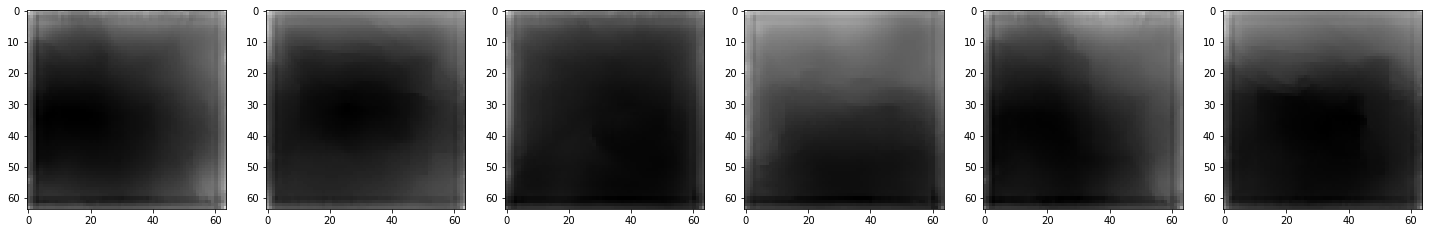

In [17]:
f, axarr = plt.subplots(1,6)
f.set_figheight(25)
f.set_figwidth(25)




axarr[0].imshow(mpimg.imread('final_op/1bg/fg2/bg_mask1fg_2iter0.png'))   
axarr[1].imshow(mpimg.imread('final_op/2bg/fg11/bg_mask2fg_11iter0.png')) 
axarr[2].imshow(mpimg.imread('final_op/3bg/fg13/bg_mask3fg_13iter0.png'))
axarr[3].imshow(mpimg.imread('final_op/4bg/fg12/bg_mask4fg_12iter0.png'))
axarr[4].imshow(mpimg.imread('final_op/1bg/fg6/bg_mask1fg_6iter0.png'))
axarr[5].imshow(mpimg.imread('final_op/2bg/fg7/bg_mask2fg_7iter0.png'))

